In [104]:
import pandas as pd
import networkx as nx
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.manifold import TSNE
from math import log10

In [105]:
def layout(df):
    edges = df.stack().reset_index()
    edges.columns = ['n1','n2','correlation']
    edges = edges.loc[edges['n1'] != edges['n2']].copy()

    Gx = nx.from_pandas_edgelist(edges, 'n1', 'n2', edge_attr=['correlation'])

    #ncol = len(df_p.columns)
    #threshold = 0.05/(ncol*(ncol-1)/2)##bonferroni cutoff
    threshold = 0.05
    remove = []
    for n1, n2 in Gx.edges():
        corr = Gx[n1][n2]['correlation']
        if abs(corr) > threshold:
            remove.append((n1, n2))

    Gx.remove_edges_from(remove)
    return Gx

In [106]:
def get_tsne_pos(df):
    tsne = TSNE(perplexity = 20)
    X_embedded = tsne.fit_transform(df)
    pos_dic = {}
    for i,c in enumerate(df.index):
        pos_dic[c]=X_embedded[i]
    return pos_dic

In [107]:
def color_size(df,y):
    size = {}
    color = {}
    log_colors = {}
    for x in df.columns:
        cor = stats.spearmanr(df[x].values.tolist(), y.values.tolist())
        print(x, cor)
        size[x] = cor[0]
        color[x] = cor[1]
        try:
            l = -log10(cor[1])
            log_colors[x] = l
        except:
            print('Error',cor[1])
            log_colors[x] = 0
    return size, color, log_colors

In [108]:
def plot_network(Gx, colors, sizes, positions):
    cscale = 1
    sscale = 100
    node_color_=[c*cscale for c in colors]
    node_size_=[abs(c)*sscale for c in sizes]
    vmin = min(node_color_)
    vmax = max(node_color_)

    sm = plt.cm.ScalarMappable(norm=plt.Normalize(vmin=vmin, vmax=vmax), cmap = mpl.cm.autumn)
    sm.set_array([])
    nx.draw(Gx, pos=positions, with_labels=False, node_size=node_size_,
             node_color=node_color_, edge_color='black', width = 0.001,cmap = mpl.cm.autumn, vmin=vmin, vmax=vmax)
    plt.title("correlation network ")

    cbar = plt.colorbar(sm, ticks=range(4))
    #plt.savefig('complete_net_log_facit.pdf', bbox_inches="tight")
    #plt.savefig('complete_net_log_facit.png', bbox_inches="tight")

In [109]:
def get_corr(df):
    df_corr = pd.DataFrame() # Correlation matrix
    df_p = pd.DataFrame()  # Matrix of p-values
    for x in df.columns:
        for y in df.columns:
            corr = stats.spearmanr(df[x], df[y])
            #r, p, lo, hi = pearsonr_ci (df[x].values, df[y].values)
            df_corr.loc[x,y] = corr[0]
            df_p.loc[x,y] = corr[1]
    return df_corr, df_p

In [115]:
def match_data(df1, df2, target):
    df1 = df1.dropna(axis=1)
    df2 = df2.dropna(subset=[target], axis=0)
    
    set1 = set(df1['pid'].values.tolist())
    set2 = set(df2['pid'].values.tolist())
    intersection = set1.intersection(set2)
    df1 = df1[df1['pid'].isin(intersection)]
    df2 = df2[df2['pid'].isin(intersection)]
    df1 = df1.set_index('pid')
    df1 = df1.reindex(df2['pid'].values.tolist())
    df1 = df1.reset_index()
    return df1, df2

# Read data

In [116]:
f1 = '4manuscript/cleaned_NPX_data.csv'
f2 = '4manuscript/cleaned_patient_data.csv'
df1 =  pd.read_csv(f1)
df2 = pd.read_csv(f2)
target = 'facit'

# Match data

In [122]:
df1, df2 = match_data(df1, df2, target)
net_df = df1.drop('pid', axis=1)
y = df2[target]

# Generate network info

In [123]:
df_corr, df_p = get_corr(net_df)
G = layout(df_p)
pos= nx.random_layout(G)
size, color, log_colors = color_size(net_df,y)
pos = get_tsne_pos(net_df.transpose())

OID00379 SpearmanrResult(correlation=-0.17590733702513792, pvalue=0.11857136239925982)
OID00380 SpearmanrResult(correlation=-0.34665438147803374, pvalue=0.0016323645870780494)
OID00381 SpearmanrResult(correlation=-0.14372587607460932, pvalue=0.20340639362962057)
OID00382 SpearmanrResult(correlation=-0.35351522501158295, pvalue=0.0012966768285283758)
OID00383 SpearmanrResult(correlation=-0.1857118929123981, pvalue=0.09908691888120914)
OID00384 SpearmanrResult(correlation=-0.15281502776435413, pvalue=0.17596917192179318)
OID00385 SpearmanrResult(correlation=0.1804812327141708, pvalue=0.10914390240627324)
OID00386 SpearmanrResult(correlation=-0.07668898438611754, pvalue=0.4989591465081499)
OID00387 SpearmanrResult(correlation=-0.08013699805938847, pvalue=0.4798002371304235)
OID00388 SpearmanrResult(correlation=-0.30491465133119283, pvalue=0.005957091432328384)
OID00389 SpearmanrResult(correlation=-0.03623932738233723, pvalue=0.7496219810410837)
OID00390 SpearmanrResult(correlation=-0.1011

OID01402 SpearmanrResult(correlation=-0.06714244312746948, pvalue=0.5540133058671186)
OID01403 SpearmanrResult(correlation=0.03727138589678568, pvalue=0.7427356440565491)
OID01404 SpearmanrResult(correlation=-0.20075883693554977, pvalue=0.07416275130908392)
OID01405 SpearmanrResult(correlation=-0.03888984129444346, pvalue=0.7319773414727397)
OID01406 SpearmanrResult(correlation=-0.028100138643391594, pvalue=0.8045766364771145)
OID01407 SpearmanrResult(correlation=0.1107820991759086, pvalue=0.32793298546863603)
OID01408 SpearmanrResult(correlation=-0.1642849507999288, pvalue=0.14533810928051955)
OID01409 SpearmanrResult(correlation=-0.1646485168675186, pvalue=0.1444373047004331)
OID01410 SpearmanrResult(correlation=-0.13702922366835865, pvalue=0.22548783191067523)
OID01411 SpearmanrResult(correlation=-0.17265869829215819, pvalue=0.12563890545101186)
OID01412 SpearmanrResult(correlation=-0.2254696015939914, pvalue=0.04433645970031147)
OID01413 SpearmanrResult(correlation=-0.0940580600667

OID05127 SpearmanrResult(correlation=-0.18995740634683375, pvalue=0.0914698748023049)
OID05128 SpearmanrResult(correlation=-0.3401219201990816, pvalue=0.002022892693858206)
OID05129 SpearmanrResult(correlation=-0.2963063450856797, pvalue=0.007613418392263525)
OID05131 SpearmanrResult(correlation=0.04709939765937422, pvalue=0.6782370524779435)
OID05132 SpearmanrResult(correlation=0.03553565112248603, pvalue=0.7543284950993296)
OID05133 SpearmanrResult(correlation=-0.290923221697818, pvalue=0.008843857941731632)
OID05134 SpearmanrResult(correlation=0.02563727173391236, pvalue=0.8214076421724779)
OID05135 SpearmanrResult(correlation=-0.20717401883785996, pvalue=0.06519519860329462)
OID05521 SpearmanrResult(correlation=-0.051931307977019184, pvalue=0.6473215541825028)
OID05137 SpearmanrResult(correlation=-0.045750684827992744, pvalue=0.686964863999416)
OID05138 SpearmanrResult(correlation=0.05738479899086605, pvalue=0.6131345546906642)
OID05139 SpearmanrResult(correlation=-0.03693127570452

OID05408 SpearmanrResult(correlation=-0.1893710094636244, pvalue=0.09249360570925472)
OID05409 SpearmanrResult(correlation=-0.1426117219965116, pvalue=0.20696890107702354)
OID05410 SpearmanrResult(correlation=-0.020594258538312038, pvalue=0.8561157772213113)
OID05411 SpearmanrResult(correlation=-0.0654301642284982, pvalue=0.5641873705553448)
OID05412 SpearmanrResult(correlation=-0.13793227486850107, pvalue=0.22241600542099282)
OID05413 SpearmanrResult(correlation=0.015269774838771226, pvalue=0.8930583627916424)
OID05414 SpearmanrResult(correlation=-0.06154821686165238, pvalue=0.5875743282104516)
OID05415 SpearmanrResult(correlation=-0.2703406910971701, pvalue=0.015296214757712163)
OID05416 SpearmanrResult(correlation=-0.19714663213498024, pvalue=0.07963157438078143)
OID05417 SpearmanrResult(correlation=-0.052646712174534586, pvalue=0.642792969295131)
OID05419 SpearmanrResult(correlation=0.08920269387380488, pvalue=0.43135999021960825)
OID05420 SpearmanrResult(correlation=-0.13477745963

# Plot network

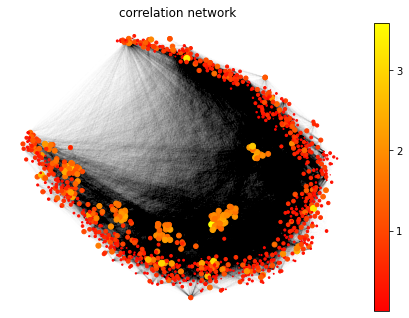

In [114]:
plot_network(G, log_colors.values(), size.values(), pos)
# SIS3

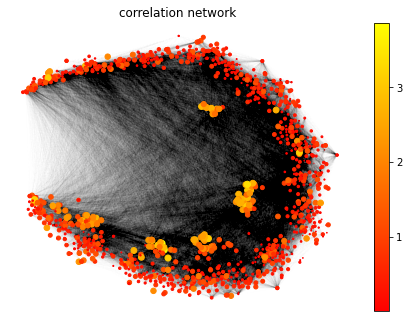

In [124]:
plot_network(G, log_colors.values(), size.values(), pos)
# FACIT

In [125]:
log_colors

{'OID00379': 0.9260201900086773,
 'OID00380': 2.7871828354887045,
 'OID00381': 0.691635400113259,
 'OID00382': 2.8871682498799394,
 'OID00383': 1.0039836758143057,
 'OID00384': 0.7545634096685118,
 'OID00385': 0.9620005222111847,
 'OID00386': 0.30193501183634974,
 'OID00387': 0.3189395417279027,
 'OID00388': 2.2249657340876667,
 'OID00389': 0.12515768718846612,
 'OID00390': 0.42969247991922055,
 'OID00391': 0.4720627231375502,
 'OID00392': 2.1704344116732033,
 'OID00393': 0.3908897327163709,
 'OID00394': 0.3677961954979347,
 'OID00395': 2.791410471490309,
 'OID00396': 0.682828625809534,
 'OID00397': 0.5370664897699126,
 'OID00398': 0.5963654974747173,
 'OID00399': 0.10977705765121874,
 'OID00400': 0.04860422122115544,
 'OID00401': 2.399298817695099,
 'OID00402': 0.36761206100313165,
 'OID00403': 0.17265401524086407,
 'OID00404': 2.045221659005576,
 'OID00405': 0.10637684235399213,
 'OID00406': 0.6463365474294067,
 'OID00407': 0.3035409671713708,
 'OID00408': 1.1676222026963006,
 'OID00